In [15]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#Enable Bokeh
output_notebook()

In [21]:
x2 = []
x3 = []
x5 = []

In [22]:
xspath = 'drive/MyDrive/Colab Notebooks/xsdata'
x2.append(pd.read_csv(os.path.join(xspath, 'x2s1.csv'), header=None, index_col = 0))
x2.append(pd.read_csv(os.path.join(xspath, 'x2s2.csv'), header=None, index_col = 0))
x2.append(pd.read_csv(os.path.join(xspath, 'x2s3.csv'), header=None, index_col = 0))
x2.append(pd.read_csv(os.path.join(xspath, 'x2s4.csv'), header=None, index_col = 0))

x3.append(pd.read_csv(os.path.join(xspath, 'x3s1.csv'), header=None, index_col = 0))
x3.append(pd.read_csv(os.path.join(xspath, 'x3s2.csv'), header=None, index_col = 0))
x3.append(pd.read_csv(os.path.join(xspath, 'x3s3.csv'), header=None, index_col = 0))
x3.append(pd.read_csv(os.path.join(xspath, 'x3s4.csv'), header=None, index_col = 0))

x5.append(pd.read_csv(os.path.join(xspath, 'x5s1.csv'), header=None, index_col = 0))
x5.append(pd.read_csv(os.path.join(xspath, 'x5s2.csv'), header=None, index_col = 0))
x5.append(pd.read_csv(os.path.join(xspath, 'x5s3.csv'), header=None, index_col = 0))
x5.append(pd.read_csv(os.path.join(xspath, 'x5s4.csv'), header=None, index_col = 0))
x5.append(pd.read_csv(os.path.join(xspath, 'x5s5.csv'), header=None, index_col = 0))
x5.append(pd.read_csv(os.path.join(xspath, 'x5s6.csv'), header=None, index_col = 0))

In [23]:
def calculate(df, thread):
    df = df.loc[:300]
    total = 0
    flag = False
    lst = df[1].tolist()
    for i in range(0, len(lst)):
        if (lst[i] < thread):            
            flag = True
        else:
            if flag and lst[i - 2] < thread:
                total += 1
            flag = False
    print(total)

In [24]:
def eyeBlink(df, thread):
    time, value = [], []
    flag = False
    index = df.index
    lst = df[1].tolist()
    for i in range(0, len(lst)):
        if (lst[i] < thread):            
            flag = True
        else:
            if flag and lst[i - 2] < thread:
                time.append(index[i])
                value.append(lst[i - 1])
            flag = False
    result = pd.DataFrame(zip(time, value), columns=['Seconds','EAR'])
    return result

In [31]:
resultX5 = [""] * (len(x5))
for i in range(0, len(x5)):
  resultX5[i] = eyeBlink(x5[i], 0.23)

In [39]:
x2[0].index[len(x2[0])- 1] / 60

7.862878402074178

In [43]:
for i in range(0, len(x2)):
    print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}".format(i + 1, int(x2[i].index[len(x2[i])- 1] / 60), len(x2[i]), 60 *len(x2[i])/x2[i].index[len(x2[i]) - 1]))

1권, 길이 7 분,  총 141 눈깜빡임,  1분당 깜빡임 17.93236430602883
2권, 길이 7 분,  총 170 눈깜빡임,  1분당 깜빡임 23.554319329652582
3권, 길이 12 분,  총 240 눈깜빡임,  1분당 깜빡임 19.817774456153604
4권, 길이 15 분,  총 147 눈깜빡임,  1분당 깜빡임 9.65949673078968


In [54]:
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}".format(1, 8, len(x3[0]), len(x3[0])/8))
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}".format(1, 9, len(x3[1]), len(x3[1])/9))
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}".format(1, 3, len(x3[2]), len(x3[2])/3))
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}".format(1, 11, len(x3[3]), len(x3[3])/11))


1권, 길이 8 분,  총 146 눈깜빡임,  1분당 깜빡임 18.25
1권, 길이 9 분,  총 167 눈깜빡임,  1분당 깜빡임 18.555555555555557
1권, 길이 3 분,  총 48 눈깜빡임,  1분당 깜빡임 16.0
1권, 길이 11 분,  총 215 눈깜빡임,  1분당 깜빡임 19.545454545454547


In [ ]:
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}, 평균 EAR 값 {}".format(1, int(48), len(result[0]), len(result[0])/48, result[0]["EAR"].sum()/len(result[0])))
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}, 평균 EAR 값 {}".format(2, int(48), len(result[1]), len(result[1])/48, result[1]["EAR"].sum()/len(result[1])))
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}, 평균 EAR 값 {}".format(3, int(49), len(result[2]), len(result[2])/49, result[2]["EAR"].sum()/len(result[2])))
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}, 평균 EAR 값 {}".format(4, int(61), len(result[3]), len(result[3])/61, result[3]["EAR"].sum()/len(result[3])))
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}, 평균 EAR 값 {}".format(5, int(42), len(result[4]), len(result[4])/42, result[4]["EAR"].sum()/len(result[4])))
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}, 평균 EAR 값 {}".format(6, int(43), len(result[5]), len(result[5])/43, result[5]["EAR"].sum()/len(result[5])))

1권, 길이 48 분,  총 2149 눈깜빡임,  1분당 깜빡임 44.770833333333336, 평균 EAR 값 0.21629252027831444
2권, 길이 48 분,  총 1023 눈깜빡임,  1분당 깜빡임 21.3125, 평균 EAR 값 0.206817423720931
3권, 길이 49 분,  총 1236 눈깜빡임,  1분당 깜빡임 25.224489795918366, 평균 EAR 값 0.20960550220189905
4권, 길이 61 분,  총 1494 눈깜빡임,  1분당 깜빡임 24.491803278688526, 평균 EAR 값 0.2103486628877688
5권, 길이 42 분,  총 1208 눈깜빡임,  1분당 깜빡임 28.761904761904763, 평균 EAR 값 0.21051849882711596
6권, 길이 43 분,  총 1188 눈깜빡임,  1분당 깜빡임 27.627906976744185, 평균 EAR 값 0.21119700206907796


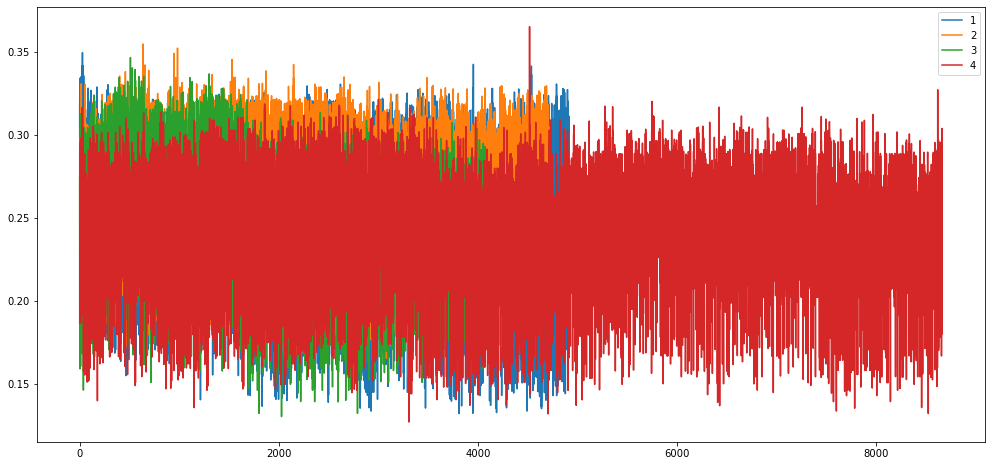

In [ ]:
plt.figure(figsize=(17,8))
plt.plot(n1.index, n1[1], label="1")
plt.plot(n2.index, n2[1], label="2")
plt.plot(n3.index, n3[1], label="3")
plt.plot(n4.index, n4[1], label="4")
plt.legend()

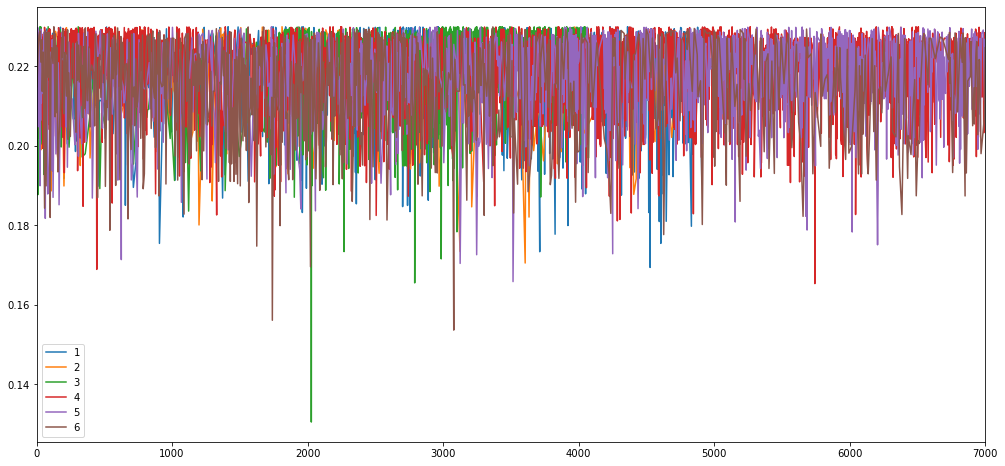

In [ ]:
plt.figure(figsize=(17,8))
plt.plot(result1["Seconds"], result1["EAR"], label="1")
plt.plot(result2["Seconds"], result2["EAR"], label="2")
plt.plot(result3["Seconds"], result3["EAR"], label="3")
plt.plot(result4["Seconds"], result4["EAR"], label="4")
plt.plot(result5["Seconds"], result5["EAR"], label="5")
plt.plot(result6["Seconds"], result6["EAR"], label="6")

plt.xlim([0,7000])
plt.legend()

In [ ]:
fig = figure(title='Analysis of EAR',
             x_axis_label='second',
             y_axis_label='EAR',
             width=800,
             height=400)
fig.scatter(result1["Seconds"], result1["EAR"],
            line_alpha=0.5,
            line_width=.5)
fig.scatter(result2["Seconds"], result2["EAR"],
            line_alpha=0.5,
            line_width=.5, color = 'red')

show(fig)

In [ ]:
14000/60

233.33333333333334

In [ ]:
14000/60

233.33333333333334